In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [10]:
df = pd.read_csv('Mall_Customers.csv')

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 
                   'Spending Score (1-100)': 'SpendingScore'}, 
                   inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


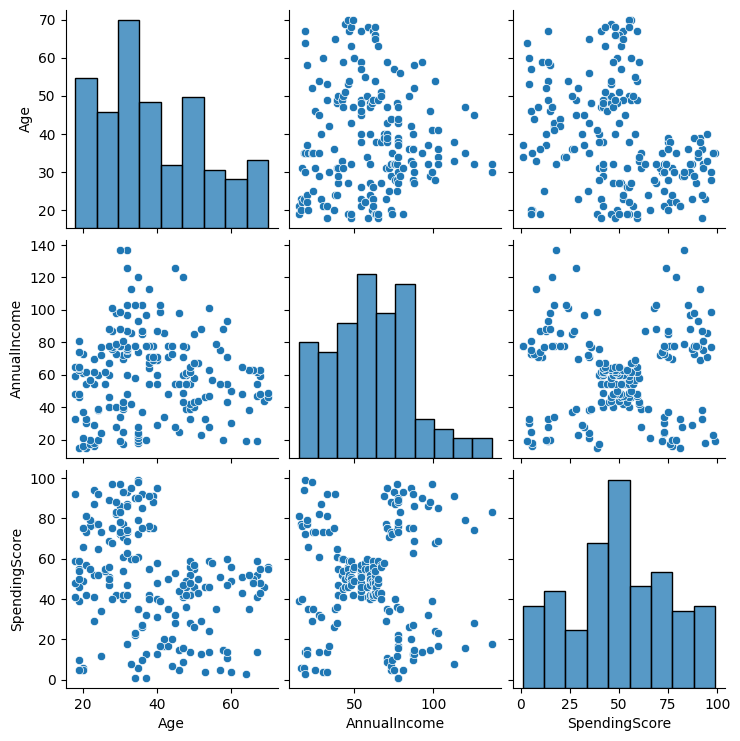

In [16]:
sns.pairplot(df[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show()

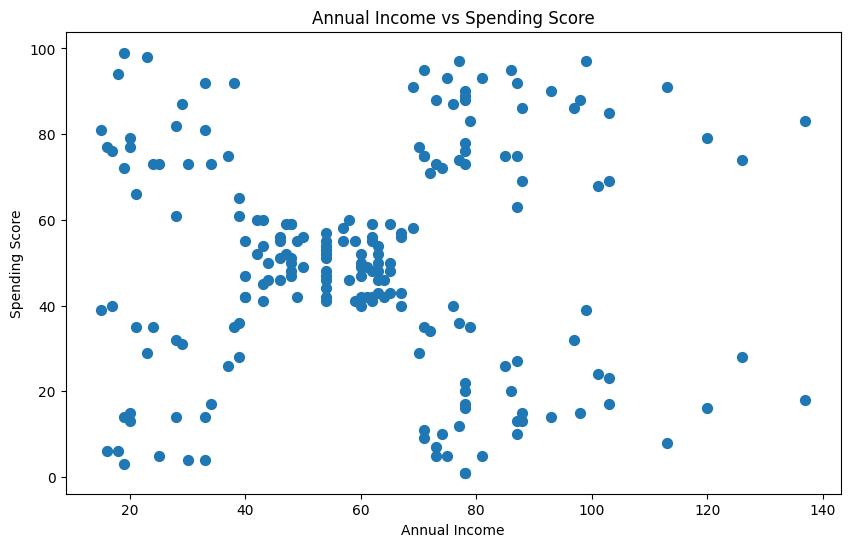

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

In [20]:
X = df[['AnnualIncome', 'SpendingScore']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10, max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)    

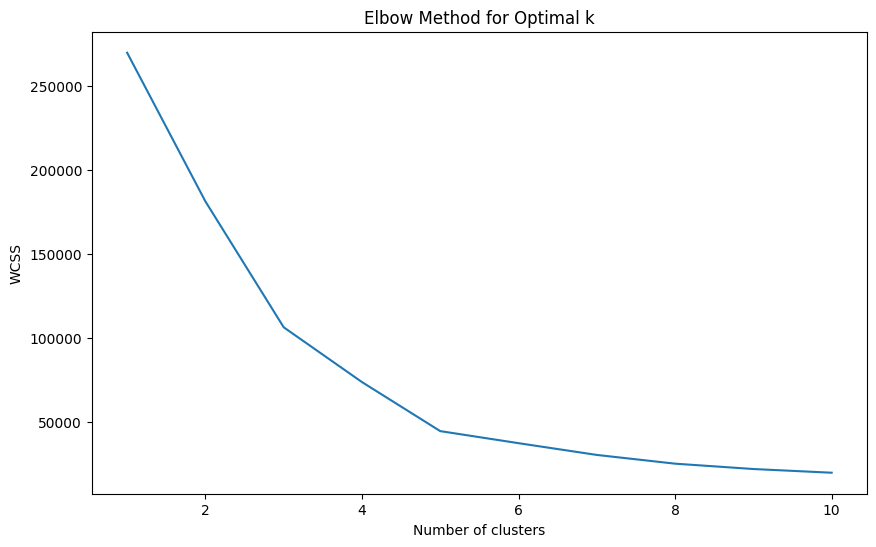

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10, max_iter=300)
y_kmeans = kmeans.fit_predict(X)  

In [25]:
df['Cluster'] = y_kmeans

In [26]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


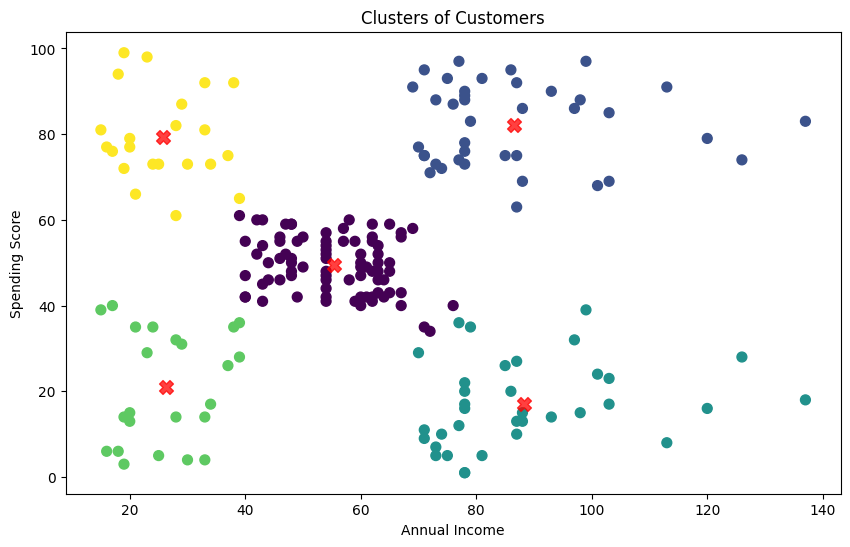

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, marker='X')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters of Customers')
plt.show()

Each cluster is associated with a unique customer segment:
1. Green: Low annual income, low sepnding: budget conscious customers
2. Yellow: Low annual income, high spending: younger customers/ don't mind spending on special occasions
3. Purple: Moderate annual income, moderate spending: balanced spending habits
4. Teal: High annual income, low spending 
5. Blue: High annual income, high spending: premium customers who are frequent shoppers and likely to spend on luxury and high-end products

Recommendations:
- Tailor marketing strategies with respect to each customer segment. For example: 
    - Provide special discounts/ promotions and event access to big spenders.
    - Target promotions of budget friendly products to cluster 1 customers.
    - Target promotions of premium products to cluster 5 customers. 

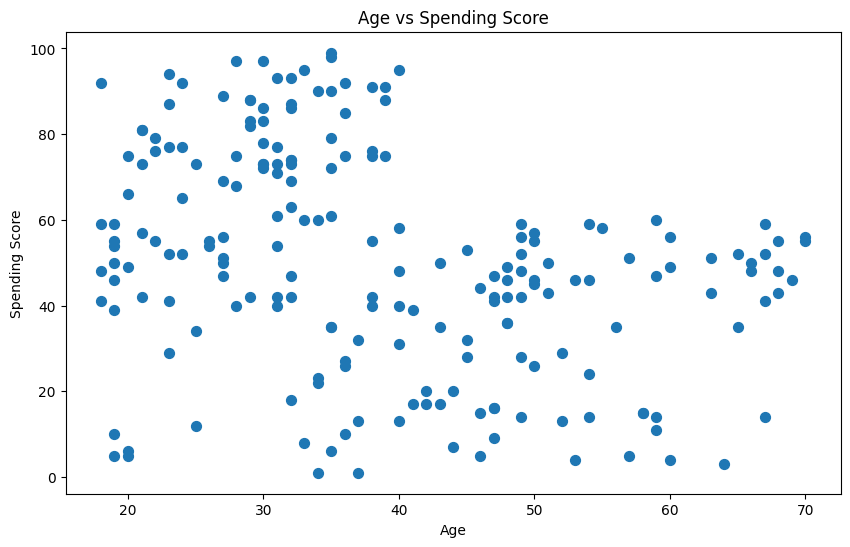

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['SpendingScore'], s=50)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.show()

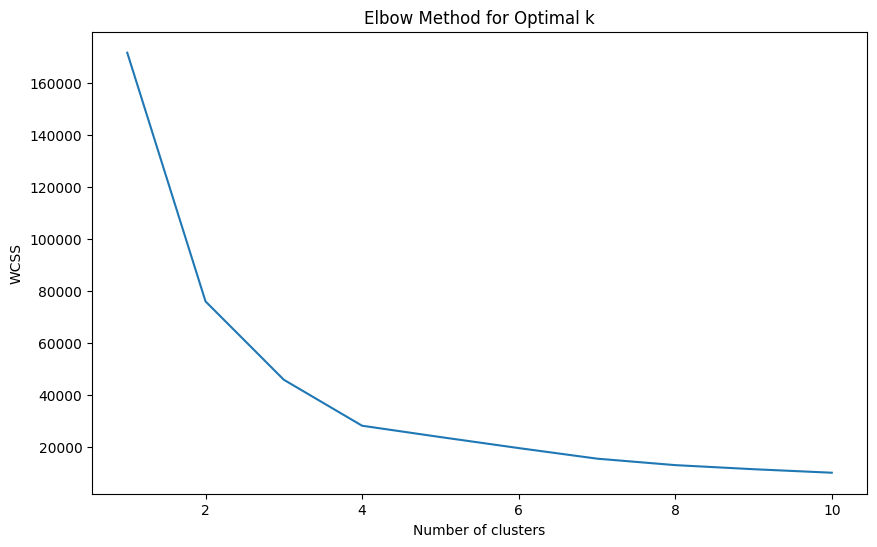

In [33]:
X = df[['Age', 'SpendingScore']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10, max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)   

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init=10, max_iter=300)
y_kmeans = kmeans.fit_predict(X)  
df['ClusterAge'] = y_kmeans

In [ ]:
df.head() 

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,ClusterAge
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,3


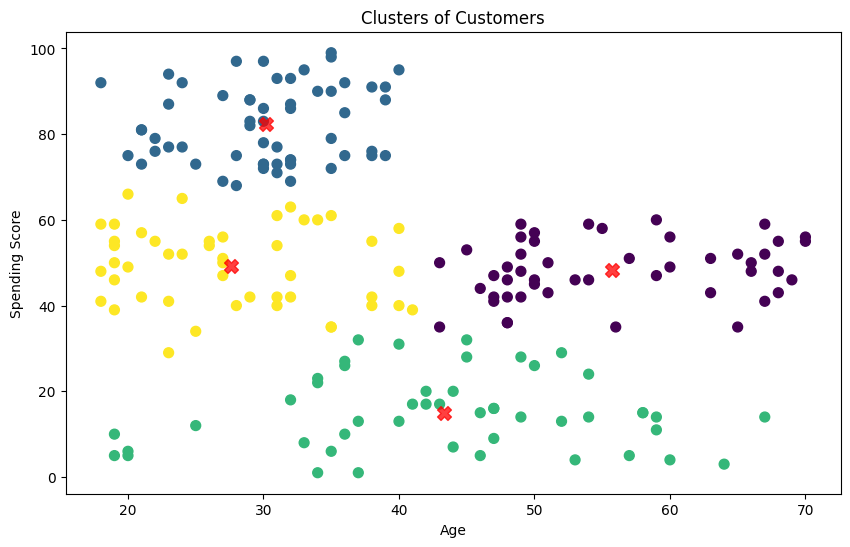

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, marker='X')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Clusters of Customers')
plt.show()

Each cluster is associated with a unique customer segment:
1. Blue: Ages 20-40 with high spending
2. Yellow: Ages 20-40 with moderate spending
3. Purple: Ages 50-70 with moderate spending
4. Teal: Customers of different ages with low spending

Insights: Younger customers have different spending patterns compared to older customers <br>

Recommendation:
Tailor marketing campaigns to preferences of different age groups. For example, Facebook marketing for older customers and TikTok marketing for younger customers. 


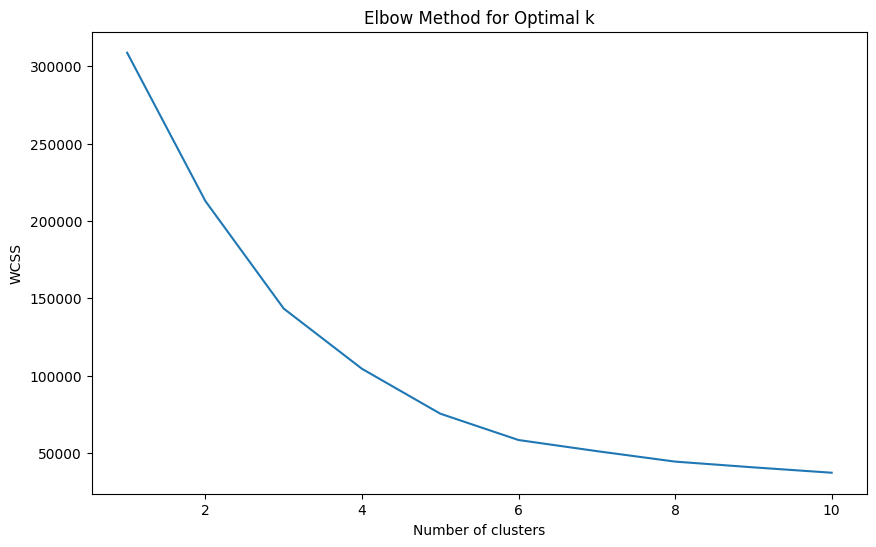

In [37]:
X = df[['Age','AnnualIncome', 'SpendingScore']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10, max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)   

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0, n_init=10, max_iter=300)
y_kmeans = kmeans.fit_predict(X)  
df['ClusterAgeIncomeSpend'] = y_kmeans

In [40]:
X

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


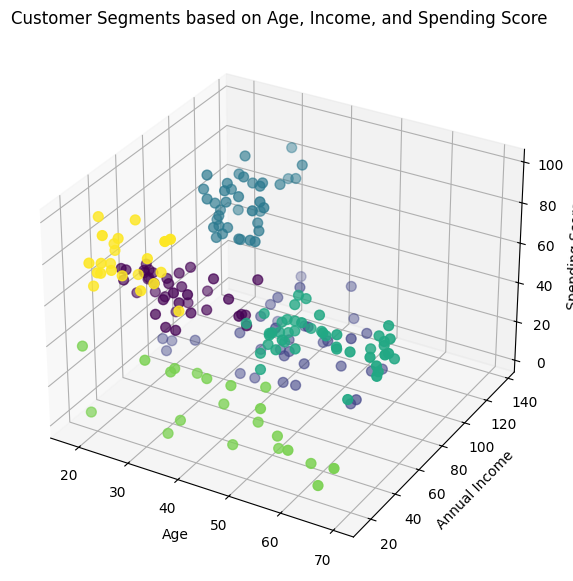

In [41]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y_kmeans, s=50, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Segments based on Age, Income, and Spending Score')
plt.show()